# Key takeaways

The LogisticRegression get a score of 0.8277.

1. L1 penalty
    A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.
1. SAGA algorithm
1. sklearn.datasets.fetch_openml, load data from https://www.openml.org/d/554
   ~~~python
       # load data from https://www.openml.org/d/554
        X, y = fetch_openml("mnist_786", version=1, return_X_y=True, as_frame=False)
   ~~~
1. sklearn.preprocessing.StandardScaler
1. coef
1. Sparsity
1. score = clf.score(X_test, y_test)
1. "abc123"[3::-1] # “1cba”
1. "abc123"[3:0:-1] # "1cb"
1. "abc123"[3:-1:-1] # ''

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

The key difference between these two is the penalty term.

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.


Cost function
Here, if lambda is zero then you can imagine we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.


Cost function
Again, if lambda is zero then we will get back OLS whereas very large value will make coefficients zero hence it will under-fit.

The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but these techniques are a great alternative when we are dealing with a large set of features.

/Users/andrewy/anaconda3/envs/little_ai_zoo/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Sparsity with L1 penalty: 72.36%
Test score with L1 penalty: 0.8277
example run in 21.130 s


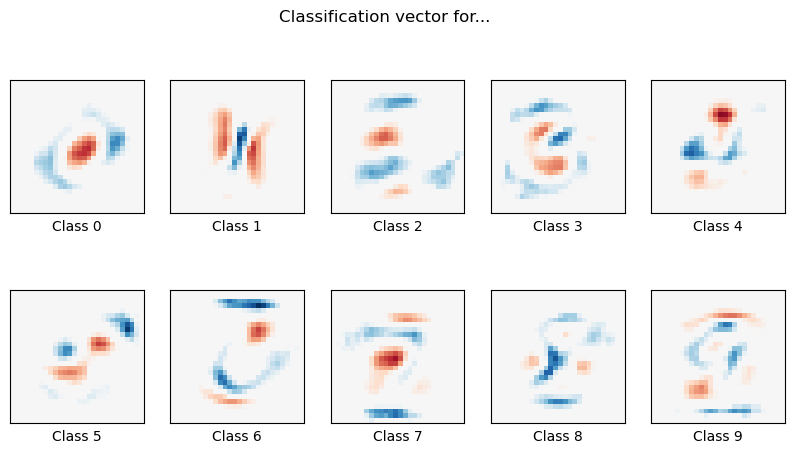

In [46]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits, fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0) # Turn seed into a np.random.RandomState instance.
permutation = random_state.permutation(X.shape[0]) # Randomly permute a sequence, or return a permuted range.
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

# Standardize features by removing the mean and scaling to unit variance.
# 将数据按期属性（按列进行）减去其均值，并处以其方差。得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。
# 使用sklearn.preprocessing.scale()函数，可以直接将给定数据进行标准化。
# 使用sklearn.preprocessing.StandardScaler类，使用该类的好处在于可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据。
# https://www.cnblogs.com/chaosimple/p/4153167.html
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergenc
clf = LogisticRegression(C=50.0/train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_==0) * 100
score = clf.score(X_test, y_test)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()

for i in range(10):
    l1_plot = plt.subplot(2, 5, i+1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("example run in %.3f s" % run_time)
plt.show()

# Permutation


In [23]:
from sklearn.utils import check_random_state
random_state = check_random_state(0)
permutation = random_state.permutation(7)
a = np.array([1,2,3,4,5,6,7])[permutation]
permutation, len(permutation), a

IndexError: index 6 is out of bounds for axis 0 with size 1

# StandardScaler

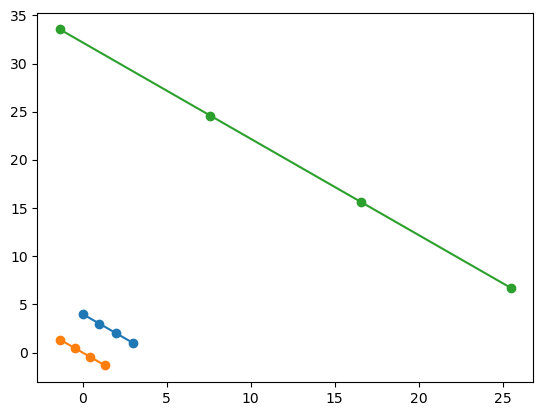

In [49]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy


# Standardize features by removing the mean and scaling to unit variance.
# 将数据按期属性（按列进行）减去其均值，并处以其方差。得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。
# 使用sklearn.preprocessing.scale()函数，可以直接将给定数据进行标准化。
# 使用sklearn.preprocessing.StandardScaler类，使用该类的好处在于可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据。
# https://www.cnblogs.com/chaosimple/p/4153167.html
scaler = StandardScaler() # 去均值和方差归一化。且是针对每一个特征维度来做的，而不是针对样本。
data = [[0, 4], [1, 3], [2, 2], [3, 1]]
scaler.fit(data)
data2 = scaler.transform(data)
data3 = scaler.transform([[0, 40], [10, 30], [20, 20], [30, 10]])

plt.scatter(numpy.array(data)[:, 0], numpy.array(data)[:, 1], label="data")
plt.plot(numpy.array(data)[:, 0], numpy.array(data)[:, 1], label="data")
plt.scatter(numpy.array(data2)[:, 0], numpy.array(data2)[:, 1], label="data2")
plt.plot(numpy.array(data2)[:, 0], numpy.array(data2)[:, 1], label="data2")
plt.scatter(numpy.array(data3)[:, 0], numpy.array(data3)[:, 1], label="data3")
plt.plot(numpy.array(data3)[:, 0], numpy.array(data3)[:, 1], label="data3")
plt.show()

In [24]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/Users/andrewy/anaconda3/envs/little_ai_zoo/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [38]:
[[0, 4], [1, 3], [2, 2], [3, 1]][:, 0:1]

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/var/folders/fd/120hdy_x5jgg_9v0_rv5k0l40000gn/T/ipykernel_71776/3120616753.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [[0, 4], [1, 3], [2, 2], [3, 1]][:, 0:1]
/var/folders/fd/120hdy_x5jgg_9v0_rv5k0l40000gn/T/ipykernel_71776/3120616753.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [[0, 4], [1, 3], [2, 2], [3, 1]][:, 0:1]
/var/folders/fd/120hdy_x5jgg_9v0_rv5k0l40000gn/T/ipykernel_71776/3120616753.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [[0, 4], [1, 3], [2, 2], [3, 1]][:, 0:1]
/var/folders/fd/120hdy_x5jgg_9v0_rv5k0l40000gn/T/ipykernel_71776/3120616753.py:1: SyntaxWarning: list indices must be integers or slices, 

TypeError: list indices must be integers or slices, not tuple

In [58]:
"abc123"[3:-1:-1]

''